In [1]:
from utils import ExtendedProcessTree as pt, create_graph, data_multimedia
import matplotlib.pyplot as plt
import networkx as nx
from pm4py import convert_to_petri_net, view_petri_net, save_vis_petri_net
from PIL import Image
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils.petri_utils import add_arc_from_to

# Using Custom Algorithm

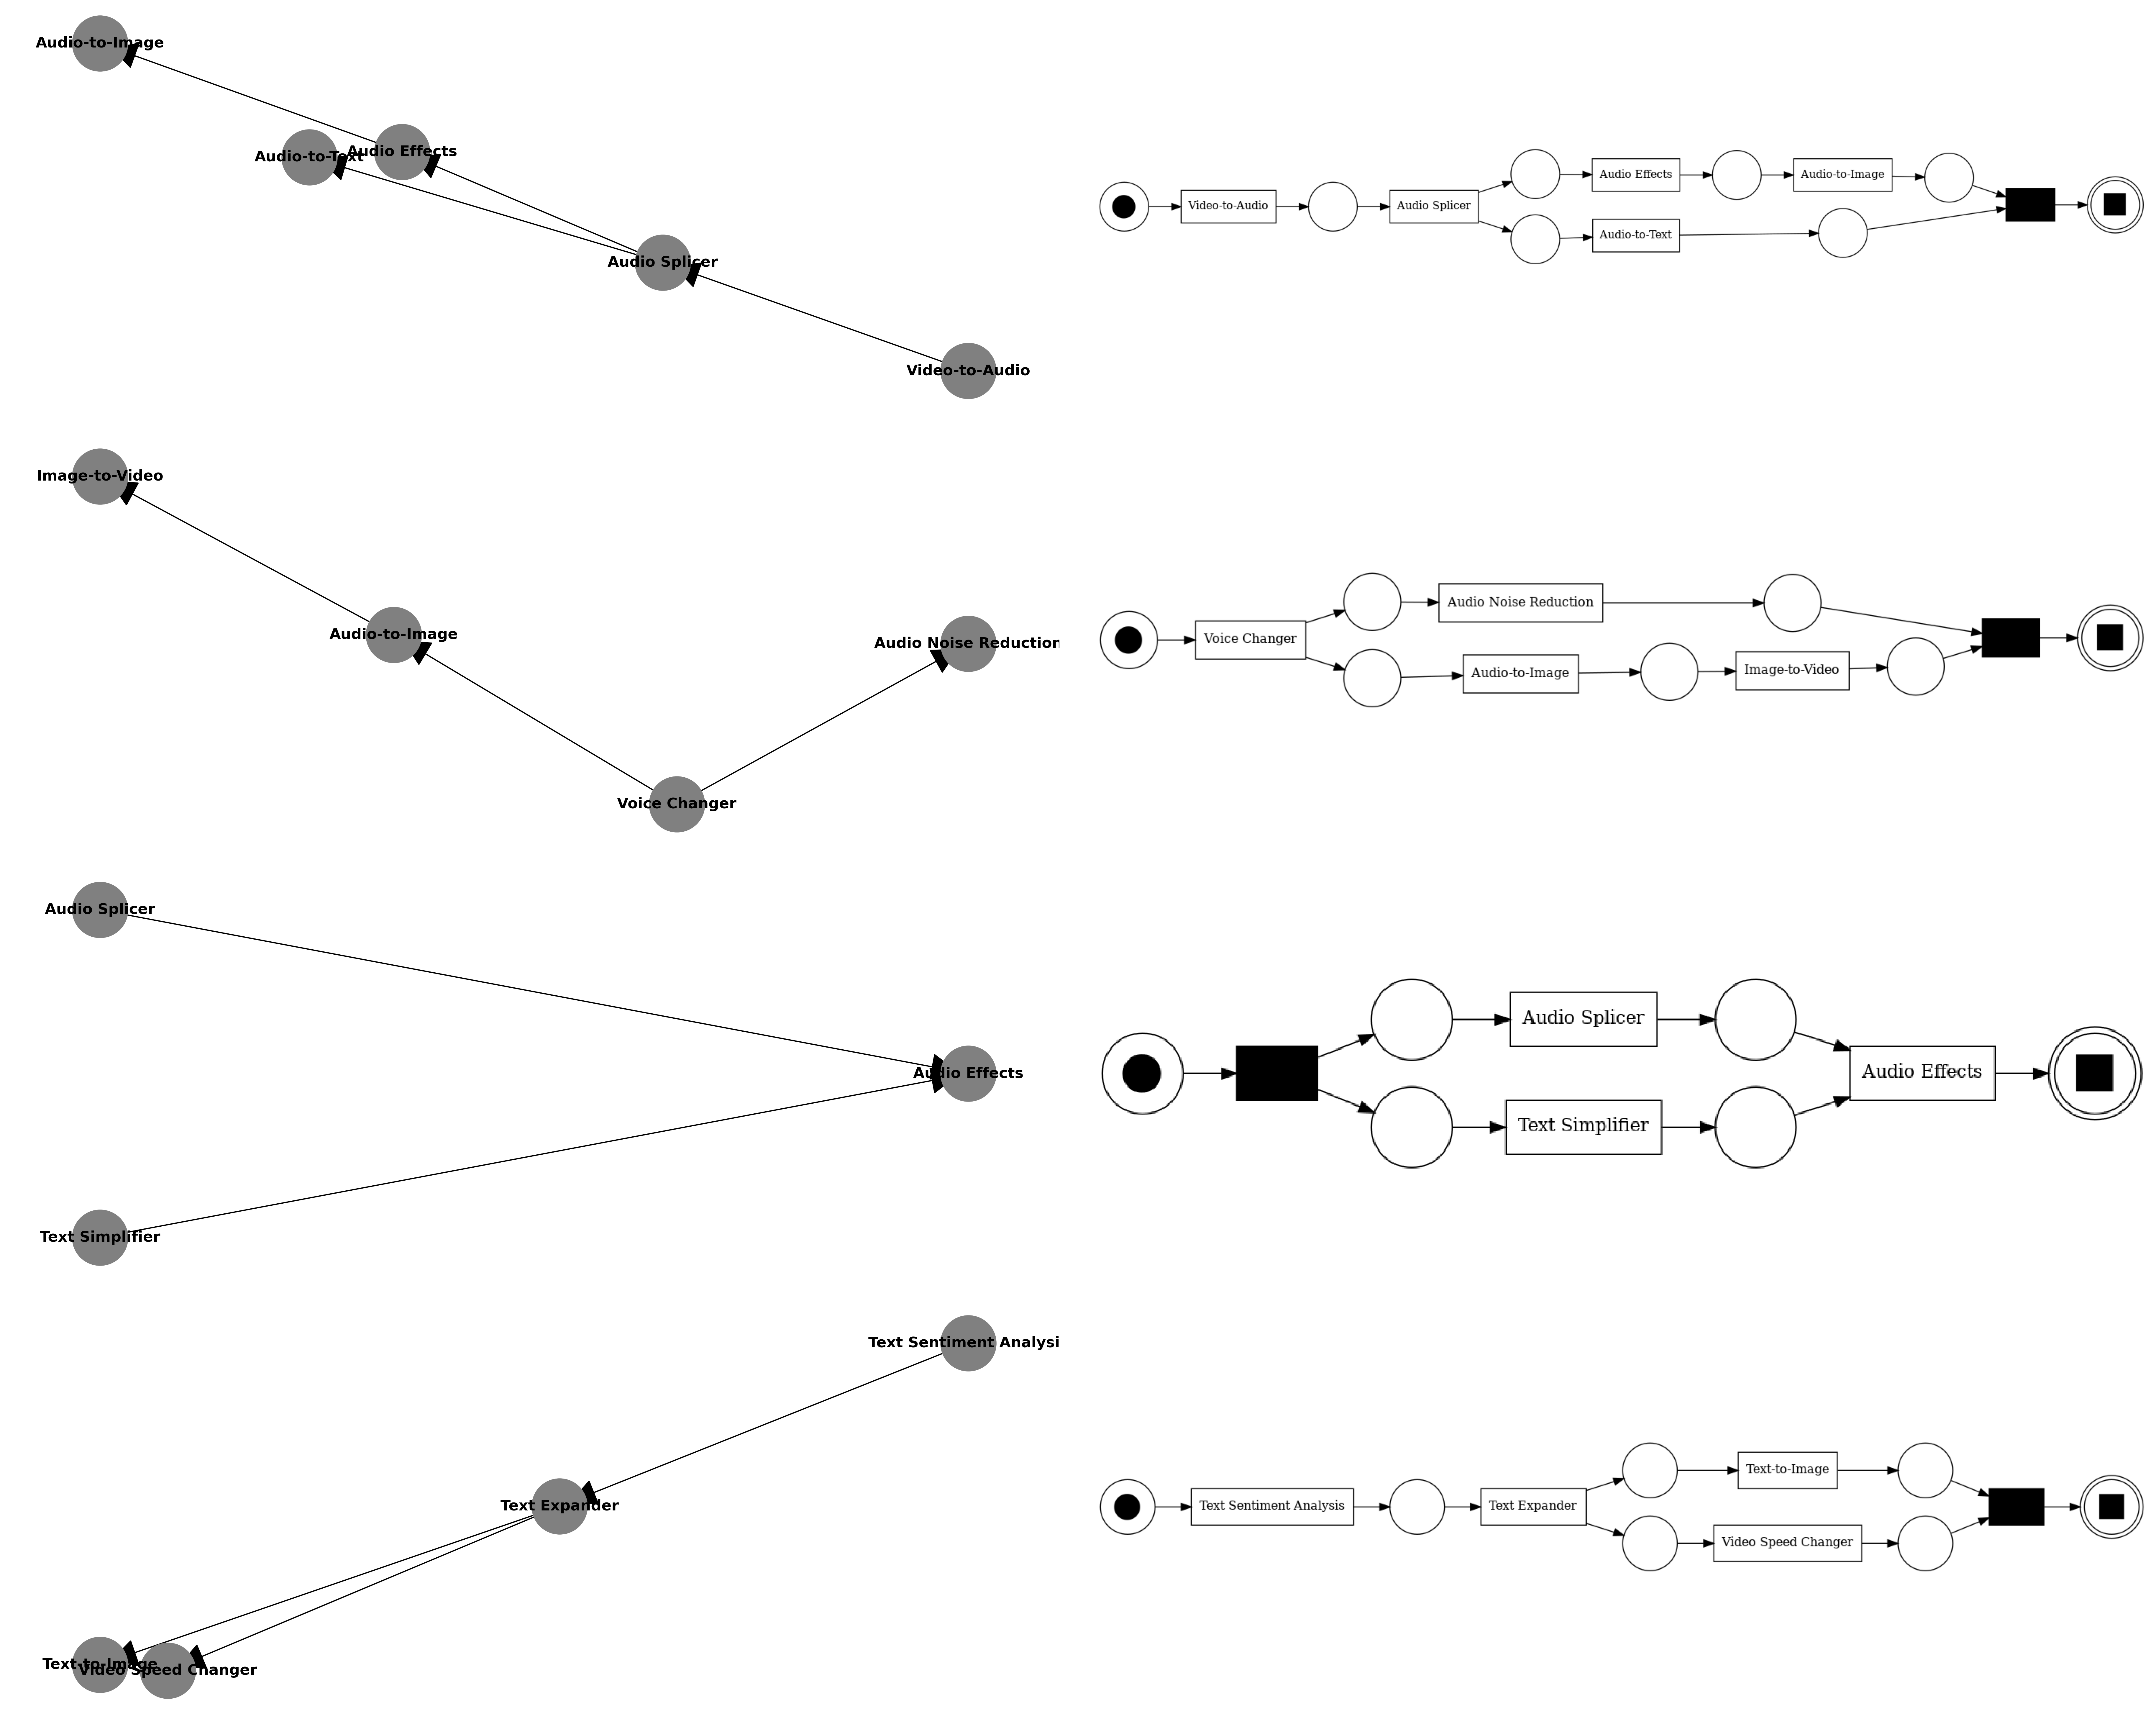

In [2]:
# Create 2x4 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(25, 20), dpi=300)
axes = axes.flatten()

for i in range(4):
    # Draw regular graph
    G = create_graph(data_multimedia[i])
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color="gray", node_size=2000, ax=axes[2*i])
    nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=50, ax=axes[2*i])
    nx.draw_networkx_labels(G, pos, font_size=12, font_color="black", font_weight="bold", ax=axes[2*i])

    for spine in axes[2*i].spines.values():
        spine.set_visible(False)

    # Convert to Petri net and save visualization
    tree = pt().convert(G)
    net, initial_marking, final_marking = convert_to_petri_net(tree)
    save_vis_petri_net(net, initial_marking, final_marking, f"images/dag_to_petri_net/petri_net_{i}.png")

    # Display Petri net image
    img = Image.open(f"images/dag_to_petri_net/petri_net_{i}.png")
    axes[2*i+1].imshow(img)
    axes[2*i+1].axis("off")

plt.tight_layout(pad=3.0)
plt.show()

# Using the pm4py POWL library

In [3]:
# Create an empty Petri net
net = PetriNet("new_petri_net")

# Create places
p1 = PetriNet.Place("p1")
p2 = PetriNet.Place("p2")
p3 = PetriNet.Place("p3")
p4 = PetriNet.Place("p4")

# Add places to the Petri net
net.places.add(p1)
net.places.add(p2)
net.places.add(p3)
net.places.add(p4)

# Create transitions
t1 = PetriNet.Transition("t1", "A")
t2 = PetriNet.Transition("t2", "B")
t3 = PetriNet.Transition("t3", "C")

# Add transitions to the Petri net
net.transitions.add(t1)
net.transitions.add(t2)
net.transitions.add(t3)

# Add arcs
add_arc_from_to(p1, t1, net)
add_arc_from_to(t1, p2, net)
add_arc_from_to(p2, t2, net)
add_arc_from_to(t2, p3, net)
add_arc_from_to(p3, t3, net)
add_arc_from_to(t3, p4, net)

# Create initial and final marking
initial_marking = Marking()
final_marking = Marking()
initial_marking[p1] = 1
final_marking[p4] = 1

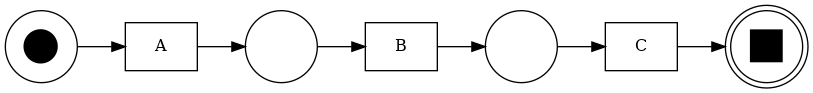

In [4]:
view_petri_net(net, initial_marking, final_marking)